<a href="https://colab.research.google.com/github/JF11579/Adelphi/blob/main/Joes_Import_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Juans_Import](https://colab.research.google.com/drive/1B40vH-Ug6KE2MJk5YoY-x3kVmjFQbopY#scrollTo=09c053c7)

# To Do List:



For looop

change each image to resize the image .


"Pad" the bars to keep the aspect ratio

duplicates

plot image and attach teh populsrity score









In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

import cv2
from PIL import Image

I am uncertain or perhaps *bewildered* is more apt by what is my colab Base Path so i try the more explicit approach

In [19]:
train_csv = pd.read_csv("/content/drive/MyDrive/Colab_data/train.csv")
train_csv.head(3)

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28


In [20]:
test_csv = pd.read_csv("/content/drive/MyDrive/Colab_data/test.csv")
test_csv.head(3)

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur
0,4128bae22183829d2b5fea10effdb0c3,1,0,1,0,0,1,1,0,0,1,0,1
1,43a2262d7738e3d420d453815151079e,0,1,0,0,0,0,1,1,0,0,0,0
2,4e429cead1848a298432a0acad014c9d,0,0,0,1,0,1,1,1,0,1,1,1


# plot an image

Here is where the wheels start to come off of the cart: what is the path of a file uploaded in colab?
*italicized text*

right clicking on the and on the files in colab reports this as the path:

/content/drive/MyDrive/Colab_data/train

[Here](https://stackoverflow.com/questions/53355510/how-to-determine-file-path-in-google-colab) is a StackOverflow Q.  Worth noting the variety of answers. could they all work???

In [21]:
base_path = "/content/drive/MyDrive/Colab_data/train/"

In [ ]:
# Some Colab v Jupyter hardship 
# Best to use: from google.colab.patches import cv2_imshow instead of "cv2"

In [22]:
from google.colab.patches import cv2_imshow

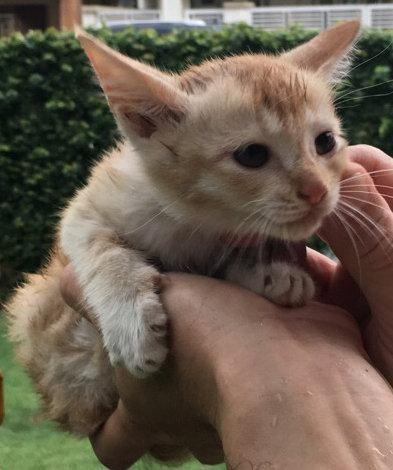

In [23]:
#from google.colab.patches import cv2_imshow

#first_image = base_path + "/petfinder-pawpularity-score/train/00a1ae8867e0bb89f061679e1cf29e80.jpg"
first_image = base_path + "0a0da090aa9f0342444a7df4dc250c66.jpg"


img = cv2.imread(first_image)

 
cv2_imshow(img)
 
#cv2.waitKey(0) # waits until a key is pressed
#cv2.destroyAllWindows() # destroys the window showing image

In [24]:
img

array([[[ 34,  44,  51],
        [ 37,  47,  54],
        [ 39,  49,  56],
        ...,
        [ 53,  66,  68],
        [ 63,  76,  78],
        [ 68,  81,  83]],

       [[ 41,  49,  56],
        [ 41,  51,  58],
        [ 44,  52,  59],
        ...,
        [ 66,  75,  78],
        [ 73,  85,  87],
        [ 82,  91,  94]],

       [[ 46,  52,  59],
        [ 45,  53,  60],
        [ 47,  53,  60],
        ...,
        [ 84,  88,  89],
        [ 90,  95,  96],
        [ 96, 100, 101]],

       ...,

       [[ 78, 133, 116],
        [ 76, 132, 113],
        [ 79, 137, 112],
        ...,
        [142, 156, 192],
        [145, 159, 195],
        [142, 156, 192]],

       [[ 88, 143, 128],
        [ 82, 138, 119],
        [ 79, 137, 112],
        ...,
        [144, 158, 194],
        [141, 155, 191],
        [142, 156, 192]],

       [[100, 155, 140],
        [ 90, 146, 127],
        [ 81, 139, 115],
        ...,
        [142, 156, 192],
        [134, 148, 184],
        [141, 155, 191]]

In [25]:
img.shape

(470, 393, 3)

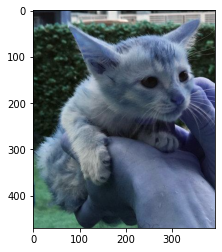

In [26]:
#first_image = base_path + "/petfinder-pawpularity-score/train/00a1ae8867e0bb89f061679e1cf29e80.jpg"
#img = cv2.imread(first_image)
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
plt.imshow(img)

In [27]:
RGB_img

array([[[ 51,  44,  34],
        [ 54,  47,  37],
        [ 56,  49,  39],
        ...,
        [ 68,  66,  53],
        [ 78,  76,  63],
        [ 83,  81,  68]],

       [[ 56,  49,  41],
        [ 58,  51,  41],
        [ 59,  52,  44],
        ...,
        [ 78,  75,  66],
        [ 87,  85,  73],
        [ 94,  91,  82]],

       [[ 59,  52,  46],
        [ 60,  53,  45],
        [ 60,  53,  47],
        ...,
        [ 89,  88,  84],
        [ 96,  95,  90],
        [101, 100,  96]],

       ...,

       [[116, 133,  78],
        [113, 132,  76],
        [112, 137,  79],
        ...,
        [192, 156, 142],
        [195, 159, 145],
        [192, 156, 142]],

       [[128, 143,  88],
        [119, 138,  82],
        [112, 137,  79],
        ...,
        [194, 158, 144],
        [191, 155, 141],
        [192, 156, 142]],

       [[140, 155, 100],
        [127, 146,  90],
        [115, 139,  81],
        ...,
        [192, 156, 142],
        [184, 148, 134],
        [191, 155, 141]]

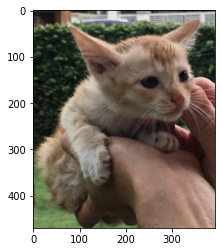

In [28]:
plt.imshow(RGB_img)

SO reports the error above results from there not being no such file called.  Here we try old school and just call it locally.....

In [ ]:
#/home/joe/Downloads/Pet__Finder/train/0a0da090aa9f0342444a7df4dc250c66.jpg

first_image = "/home/joe/Downloads/Pet__Finder/train/0a0da090aa9f0342444a7df4dc250c66.jpg"


#img = cv2.imread(first_image)
img = cv2_imshow(first_image)
 
cv2_imshow(img)

AttributeError: ignored